### Imports

In [226]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [227]:
engagement = pd.read_csv('/content/takehome_user_engagement.csv',encoding = "ISO-8859-1")
users = pd.read_csv('/content/takehome_users.csv',encoding = "ISO-8859-1")

### Understand the data

In [228]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [229]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [230]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [231]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


### Set same name for Object_id and User_id

In [232]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)

### Change the time_stamp format in to pandas datetime format

In [233]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)


### By using pandas rolling method to get the adopted_user - Basically provides a 7 day window data

In [234]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()
engagement['visits_7_days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [235]:
engagement_1 = engagement.groupby('user_id')[['visits_7_days']].max()

In [236]:
engagement_1.head()

,visits_7_days
user_id,
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0


In [237]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)

### If the user visits_7_days value greater than 3, then it is adopted user, else not

In [238]:
engagement_1.loc[engagement_1['visits_7_days'] >= 3,'adopted_user'] = 1
engagement_1.loc[engagement_1['visits_7_days'] < 3,'adopted_user'] = 0

In [239]:
engagement_1.head(50)

,visits_7_days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
10,7,1.0
11,1,0.0


In [240]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)
engagement_1['adopted_user'] = engagement_1['adopted_user'].astype(int)

### Get the first login date of the user

In [241]:
time = engagement.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


### Merge two dataframe into one

In [242]:
df = users.merge(engagement_1, how = 'left',on = 'user_id',sort = True)


In [243]:
df = df.merge(time,how='left',on = 'user_id',sort = True)

In [244]:
df = df.rename({'time_stamp':'first_login'},axis = 'columns')

In [245]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  visits_7_days               8823 non-null   float64       
 11  adopted_user                8823 non-null   float64   

In [247]:
df.creation_time = pd.to_datetime(df.creation_time)

### Feature engineer: get the time difference between first_login and creation_time

In [248]:
df['first_login_creation_gap'] = (df['first_login']-df['creation_time']).dt.days

In [249]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0


###  Feature Engineer: Getting the average login time of the user, to have the mean_login_gap_length feature for model

In [250]:
user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']
user_login_gap.head()
user_login_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 1 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mean_login_gap_length  199094 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [251]:
user_login_gap.head()

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [252]:
engagement = engagement.merge(user_login_gap, left_index = True, right_index = True)
engagement.head()

,time_stamp,user_id,visited,visits_7_days,mean_login_gap_length
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [253]:
gap_mean = engagement.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean.head()

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [254]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df.head()


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


### Feature Engineer : create a new feature of org_id by cluster org_id into different size

In [255]:
df.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [256]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df.org_id.apply(org_size)



In [257]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature Engineering normalized the session creation time, since the value are too big compare to other columns

In [258]:
df.last_session_creation_time.head(20)

0     1.398139e+09
1     1.396238e+09
2     1.363735e+09
3     1.369210e+09
4     1.358850e+09
5     1.387424e+09
6     1.356010e+09
7              NaN
8              NaN
9     1.401833e+09
10    1.388117e+09
11             NaN
12    1.396196e+09
13    1.350058e+09
14             NaN
15             NaN
16    1.397314e+09
17             NaN
18    1.369926e+09
19    1.401364e+09
Name: last_session_creation_time, dtype: float64

In [259]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)

In [260]:
df['last_session_creation_time'].head(20)

0     139.813881
1     139.623750
2     136.373489
3     136.921017
4     135.884966
5     138.742423
6     135.600987
7            NaN
8            NaN
9     140.183328
10    138.811655
11           NaN
12    139.619638
13    135.005847
14           NaN
15           NaN
16    139.731358
17           NaN
18    136.992580
19    140.136400
Name: last_session_creation_time, dtype: float64

In [261]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature Engineering the invited_by_user_id, and cluster them into different clusters

In [262]:
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

### Feature Engineering Also cluster the group_size

In [263]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'
    
    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)

In [264]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,Large
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,Large
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,Large
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,Large
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,Large


In [265]:
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [266]:
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [267]:
df[['user_id','adopted_user']]

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
11995,11996,0.0
11996,11997,0.0
11997,11998,0.0
11998,11999,0.0


In [268]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','email','visits_7_days','first_login'], axis = 1)

In [269]:
df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large


###  Get dummy variable to covert string to number for modeling

In [270]:
df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size'])

In [271]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,0,0,0,1,1,0,0
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,0,0,0,1,1,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,0,0,0,1,1,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,0,0,0,1,1,0,0
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,0,0,1,0,1,0,0


In [272]:
df.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
count,8823.000000,12000.000000,12000.000000,8823.000000,8823.000000,2588.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,137.927931,0.249500,0.149333,0.181571,1.001813,7.822104,0.180250,0.354500,0.175917,0.173917,0.115417,0.154500,0.363667,0.481833,0.534167,0.000500,0.465333
std,1.953116,0.432742,0.356432,0.385512,1.401329,7.039812,0.384412,0.478381,0.380765,0.379054,0.319537,0.361442,0.481074,0.499691,0.498852,0.022356,0.498818
min,133.845241,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.319497,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,138.288847,0.000000,0.000000,0.000000,1.000000,5.626453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,139.844260,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,140.206673,1.000000,1.000000,1.000000,14.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          8823 non-null   float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        8823 non-null   float64
 4   first_login_creation_gap            8823 non-null   float64
 5   mean_login_gap_length               2588 non-null   float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

### Fill the missing value with mean

In [274]:
df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_creation_gap = df.first_login_creation_gap.fillna(1.001813)
df.mean_login_gap_length = df.mean_login_gap_length.fillna(7.822104)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          12000 non-null  float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        12000 non-null  float64
 4   first_login_creation_gap            12000 non-null  float64
 5   mean_login_gap_length               12000 non-null  float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

## By using univariate selection to select the feature have the strongest relationship with output.

### ChiSquareTest - This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X

In [276]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                                 Specs        Score
4                mean_login_gap_length  2716.483567
7    creation_source_PERSONAL_PROJECTS    56.844560
0           last_session_creation_time    36.239314
12                      org_size_small    22.581597
5         creation_source_GUEST_INVITE    20.283149
11                     org_size_medium    15.133797
9   creation_source_SIGNUP_GOOGLE_AUTH    13.848040
3             first_login_creation_gap     6.073792
10                      org_size_Large     5.873229
15                    group_size_small     4.935692


### Used correlation matrix to plot the heat map

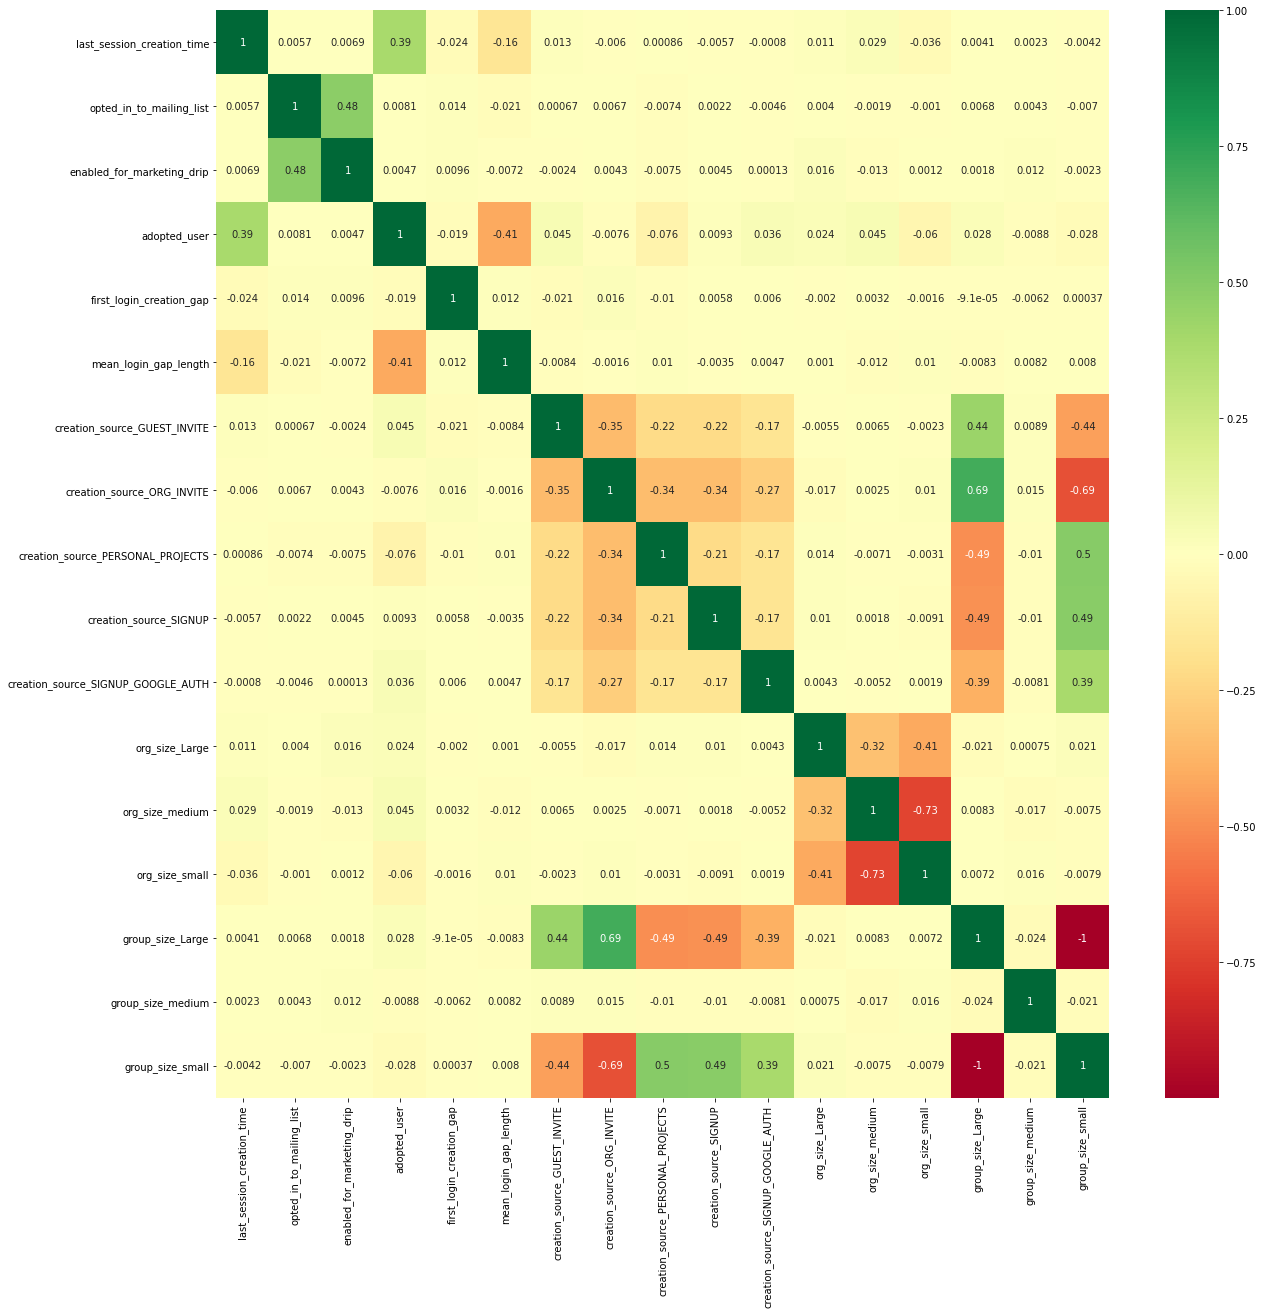

In [277]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# It is clear from this test that features - [mean_login_gap_length, creation_source_PERSONAL_PROJECTS, last_session_creation_time] should be the most important features to be used in modeling the data to find adopted_users. 